<a href="https://colab.research.google.com/github/Rairocha/teste1/blob/main/TimeSeries_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series 

In [ ]:
!pip install yfinance
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 840 kB/s 
     |████████████████████████████████| 6.4 MB 27.9 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |██████████

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.linear_model import LinearRegression

In [ ]:
stock_df = pd.DataFrame(yf.Ticker('MGLU3.SA').history(period = '1y')).reset_index()

In [ ]:
stock_df.rename({'Date':'ds','Close':'y'},axis=1,inplace=True)

In [ ]:
df_prophet = stock_df[['ds','y']]
df_prophet.tail(7).T

,243,244,245,246,247,248,249
ds,2022-06-29 00:00:00,2022-06-30 00:00:00,2022-07-01 00:00:00,2022-07-04 00:00:00,2022-07-05 00:00:00,2022-07-06 00:00:00,2022-07-07 00:00:00
y,2.41,2.34,2.2,2.13,2.38,2.5,2.57


In [ ]:
df_prophet

,ds,y
0,2021-07-07,22.01
1,2021-07-08,21.92
2,2021-07-12,22.10
3,2021-07-13,22.49
4,2021-07-14,22.93
...,...,...
245,2022-07-01,2.20
246,2022-07-04,2.13
247,2022-07-05,2.38
248,2022-07-06,2.50


In [ ]:
df_reg = []
for i in range(0,len(df_prophet)-7):
    x = df_prophet.T.loc[['y'],i:i+6]
    x.columns = [0,1,2,3,4,5,6]
    df_reg.append(x)

In [ ]:
X = pd.concat(df_reg,axis=0,ignore_index = True)
y = df_prophet.loc[7:,'y'].reset_index(drop=True)

In [ ]:
X

,0,1,2,3,4,5,6
0,22.01,21.92,22.1,22.49,22.93,23.719999,23.9
1,21.92,22.1,22.49,22.93,23.719999,23.9,23.120001
2,22.1,22.49,22.93,23.719999,23.9,23.120001,23.370001
3,22.49,22.93,23.719999,23.9,23.120001,23.370001,23.360001
4,22.93,23.719999,23.9,23.120001,23.370001,23.360001,23.25
...,...,...,...,...,...,...,...
238,2.44,2.55,2.47,2.43,2.38,2.41,2.34
239,2.55,2.47,2.43,2.38,2.41,2.34,2.2
240,2.47,2.43,2.38,2.41,2.34,2.2,2.13
241,2.43,2.38,2.41,2.34,2.2,2.13,2.38


In [ ]:
pd.concat([X[:-1],y],axis=1)

,0,1,2,3,4,5,6,y
0,22.01,21.92,22.1,22.49,22.93,23.719999,23.9,23.120001
1,21.92,22.1,22.49,22.93,23.719999,23.9,23.120001,23.370001
2,22.1,22.49,22.93,23.719999,23.9,23.120001,23.370001,23.360001
3,22.49,22.93,23.719999,23.9,23.120001,23.370001,23.360001,23.250000
4,22.93,23.719999,23.9,23.120001,23.370001,23.360001,23.25,22.600000
...,...,...,...,...,...,...,...,...
238,2.44,2.55,2.47,2.43,2.38,2.41,2.34,2.200000
239,2.55,2.47,2.43,2.38,2.41,2.34,2.2,2.130000
240,2.47,2.43,2.38,2.41,2.34,2.2,2.13,2.380000
241,2.43,2.38,2.41,2.34,2.2,2.13,2.38,2.500000


In [ ]:
model = LinearRegression()
model.fit(X[:-1],y)
model.predict(X[-1:])

array([2.61634218])

In [ ]:
X[-1:]

,0,1,2,3,4,5,6
242,2.38,2.41,2.34,2.2,2.13,2.38,2.5


In [ ]:
stock_df.tail(7)

,ds,Open,High,Low,y,Volume,Dividends,Stock Splits
243,2022-06-29,2.40,2.49,2.37,2.41,113299200,0,0
244,2022-06-30,2.38,2.42,2.31,2.34,231980300,0,0
245,2022-07-01,2.34,2.34,2.20,2.20,114418200,0,0
246,2022-07-04,2.18,2.22,2.11,2.13,103383200,0,0
247,2022-07-05,2.10,2.42,2.03,2.38,271736400,0,0
248,2022-07-06,2.38,2.61,2.38,2.50,263127600,0,0
249,2022-07-07,2.56,2.65,2.43,2.64,158115100,0,0


In [ ]:
model = Prophet()
model.fit(df_prophet)

10:33:54 - cmdstanpy - INFO - Chain [1] start processing
10:33:55 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods=1)
future

,ds
0,2021-07-07
1,2021-07-08
2,2021-07-12
3,2021-07-13
4,2021-07-14
...,...
246,2022-07-04
247,2022-07-05
248,2022-07-06
249,2022-07-07


In [ ]:
forecast = model.predict(future)

In [ ]:
stock_df

,ds,Open,High,Low,y,Volume,Dividends,Stock Splits
0,2021-07-07,21.299999,22.150000,21.280001,22.01,30825300,0,0
1,2021-07-08,21.680000,22.070000,21.480000,21.92,18120000,0,0
2,2021-07-12,22.059999,22.400000,21.950001,22.10,20406700,0,0
3,2021-07-13,21.969999,22.540001,21.770000,22.49,22948200,0,0
4,2021-07-14,22.600000,22.930000,22.510000,22.93,29771000,0,0
...,...,...,...,...,...,...,...,...
245,2022-07-01,2.340000,2.340000,2.200000,2.20,114418200,0,0
246,2022-07-04,2.180000,2.220000,2.110000,2.13,103383200,0,0
247,2022-07-05,2.100000,2.420000,2.030000,2.38,271736400,0,0
248,2022-07-06,2.380000,2.610000,2.380000,2.50,263127600,0,0


In [ ]:
forecast[['ds','yhat_lower','yhat_upper','yhat']].tail()

,ds,yhat_lower,yhat_upper,yhat
246,2022-07-04,1.237749,2.882036,2.066025
247,2022-07-05,1.167106,2.817525,2.006852
248,2022-07-06,1.164015,2.842684,1.996974
249,2022-07-07,1.244737,2.804717,1.997365
250,2022-07-08,1.090878,2.709468,1.928835


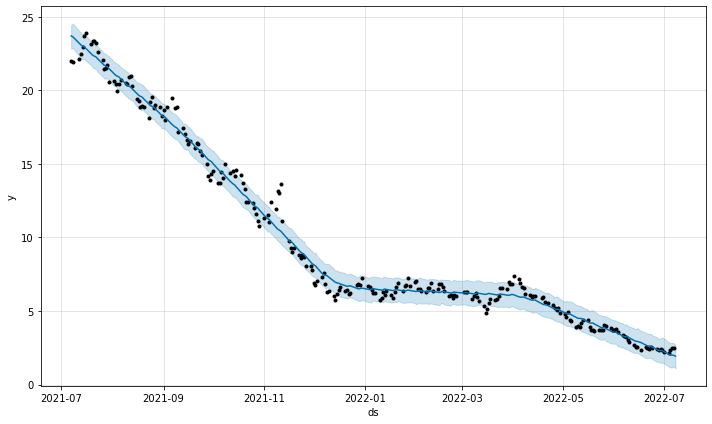

In [ ]:
fig1 = model.plot(forecast)

AttributeError: type object 'Prophet' has no attribute 'help'